In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?
data = pd.read_excel("flight_price.xlsx")
data.shape

(10683, 11)

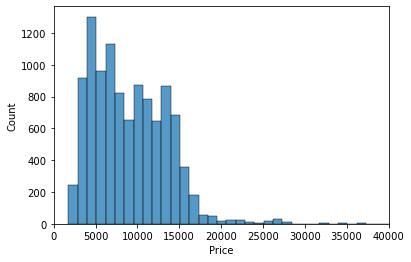

In [5]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.
sns.histplot(data = data.Price, bins=70)
plt.xlim(0,40000)
plt.show()

In [6]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
[min(data.Price), max(data.Price)]

[1759, 79512]

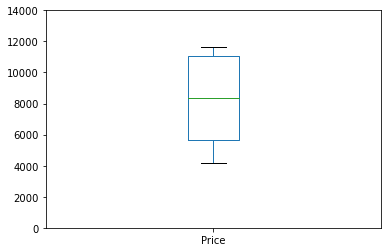

In [7]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.
data.groupby(by=data.Airline).mean().plot(kind='box')
plt.ylim(0,14000)
plt.show()

<AxesSubplot:>

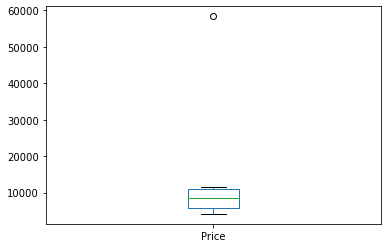

In [8]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.
data.groupby(by=data.Airline).mean().plot(kind='box')

In [9]:
data.groupby(by=data.Airline).mean()

,Price
Airline,
Air Asia,5590.260188
Air India,9611.210616
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


Only 1 buisness class airplane lines present in the data set while others come under economy so there's a huge difference in terms of experience, luxury services and prices.

'Jet Airways Business' is the outlier and we can see the above box plot where there's a huge gap in max value and outlier value.

let's see the boxplot after removing this outlier

<AxesSubplot:>

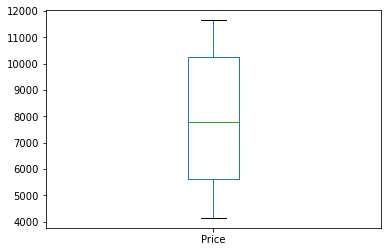

In [10]:
data[data['Airline'] != 'Jet Airways Business'].groupby(by=data.Airline).mean().plot(kind='box')

There's a major difference in both plots it can create large gap if we had consider mean price of dataset.

In [11]:
# Number of flights of jet airways business class
len(data[data['Airline'] == 'Jet Airways Business'])

6

As we can see the data points are insufficient to consider this in our analysis so it is better to drop this flight service data.

In [12]:
data = data[data['Airline'] != 'Jet Airways Business']

In [13]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?
data[['Date_of_Journey','Source','Destination','Price']]

,Date_of_Journey,Source,Destination,Price
0,24/03/2019,Banglore,New Delhi,3897
1,1/05/2019,Kolkata,Banglore,7662
2,9/06/2019,Delhi,Cochin,13882
3,12/05/2019,Kolkata,Banglore,6218
4,01/03/2019,Banglore,New Delhi,13302
...,...,...,...,...
10678,9/04/2019,Kolkata,Banglore,4107
10679,27/04/2019,Kolkata,Banglore,4145
10680,27/04/2019,Banglore,Delhi,7229
10681,01/03/2019,Banglore,New Delhi,12648


In [14]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], dayfirst = True)
data['Date_of_Journey'] = data['Date_of_Journey'].dt.month

C:\Users\ps450\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date_of_Journey', ylabel='count'>

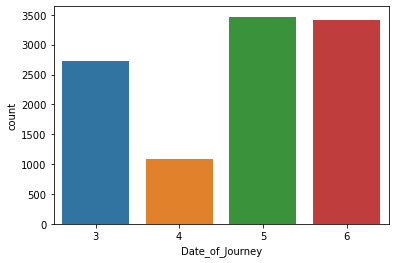

In [15]:
# May month is the peak season
sns.countplot(data['Date_of_Journey'])

<AxesSubplot:xlabel='Price', ylabel='Destination'>

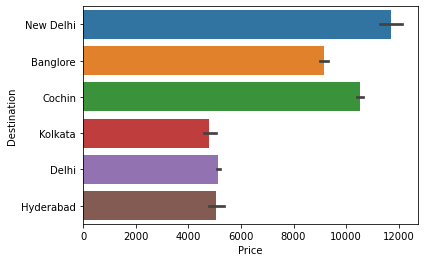

In [16]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight  Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?
sns.barplot(x=data['Price'],y=data['Destination'])

In [17]:
data.groupby(data.Route).count()['Airline'].mean()

83.40625

<AxesSubplot:xlabel='Price', ylabel='Source'>

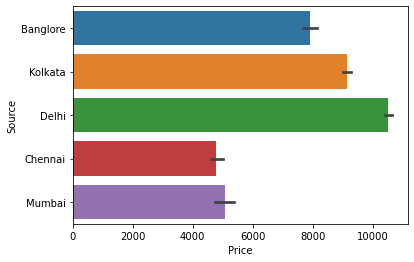

In [18]:
sns.barplot(x=data['Price'],y=data['Source'])

In [19]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [20]:
data.Destination = data.Destination.map({'New Delhi':1, 'Banglore':2, 'Cochin':3, 'Kolkata':4, 'Delhi':5, 'Hyderabad':6})

In [21]:
data.Source = data.Source.map({'New Delhi':1, 'Banglore':2, 'Cochin':3, 'Kolkata':4, 'Delhi':5})

In [22]:
j = 1;
maps = {}
for i in data.Route.unique():
    maps[i] = j
    j += 1

In [23]:
data.Route = data.Route.map(maps)

In [24]:
j = 1;
maps = {}
for i in data.Airline.unique():
    maps[i] = j
    j += 1

In [25]:
data.Airline = data.Airline.map(maps)

In [26]:
j = 1;
maps = {}
for i in data.Additional_Info.unique():
    maps[i] = j
    j += 1

In [27]:
data.Additional_Info = data.Additional_Info.map(maps)

In [28]:
j = 1;
maps = {}
for i in data.Total_Stops.unique():
    maps[i] = j
    j += 1

In [29]:
data.Total_Stops = data.Total_Stops.map(maps)

In [30]:
j = 1;
maps = {}
for i in data.Duration.unique():
    maps[i] = j
    j += 1

In [31]:
data.Duration = data.Duration.map(maps)

In [32]:
j = 1;
maps = {}
for i in data.Dep_Time.unique():
    maps[i] = j
    j += 1

In [33]:
data.Dep_Time = data.Dep_Time.map(maps)

In [34]:
j = 1;
maps = {}
for i in data.Arrival_Time.unique():
    maps[i] = j
    j += 1

In [35]:
data.Arrival_Time = data.Arrival_Time.map(maps)

<AxesSubplot:>

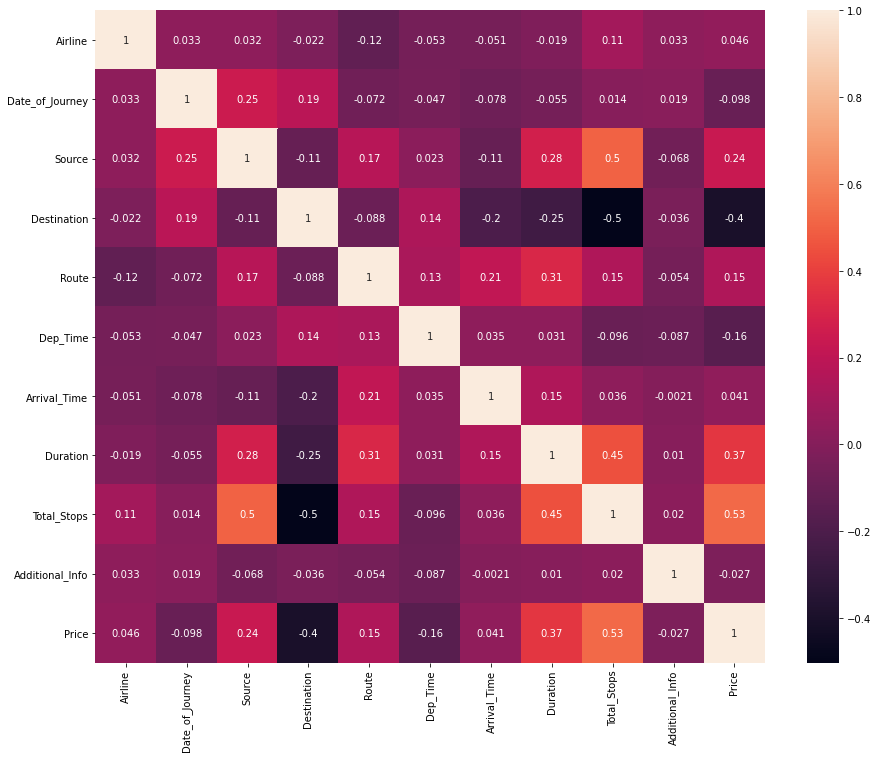

In [36]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

In [37]:
# features should be analyze to identify price trends
data.corr()['Price'][data.corr()['Price'] > 0]

Airline         0.045570
Source          0.237677
Route           0.147824
Arrival_Time    0.041118
Duration        0.368546
Total_Stops     0.528665
Price           1.000000
Name: Price, dtype: float64

In [407]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.shape

(10841, 13)

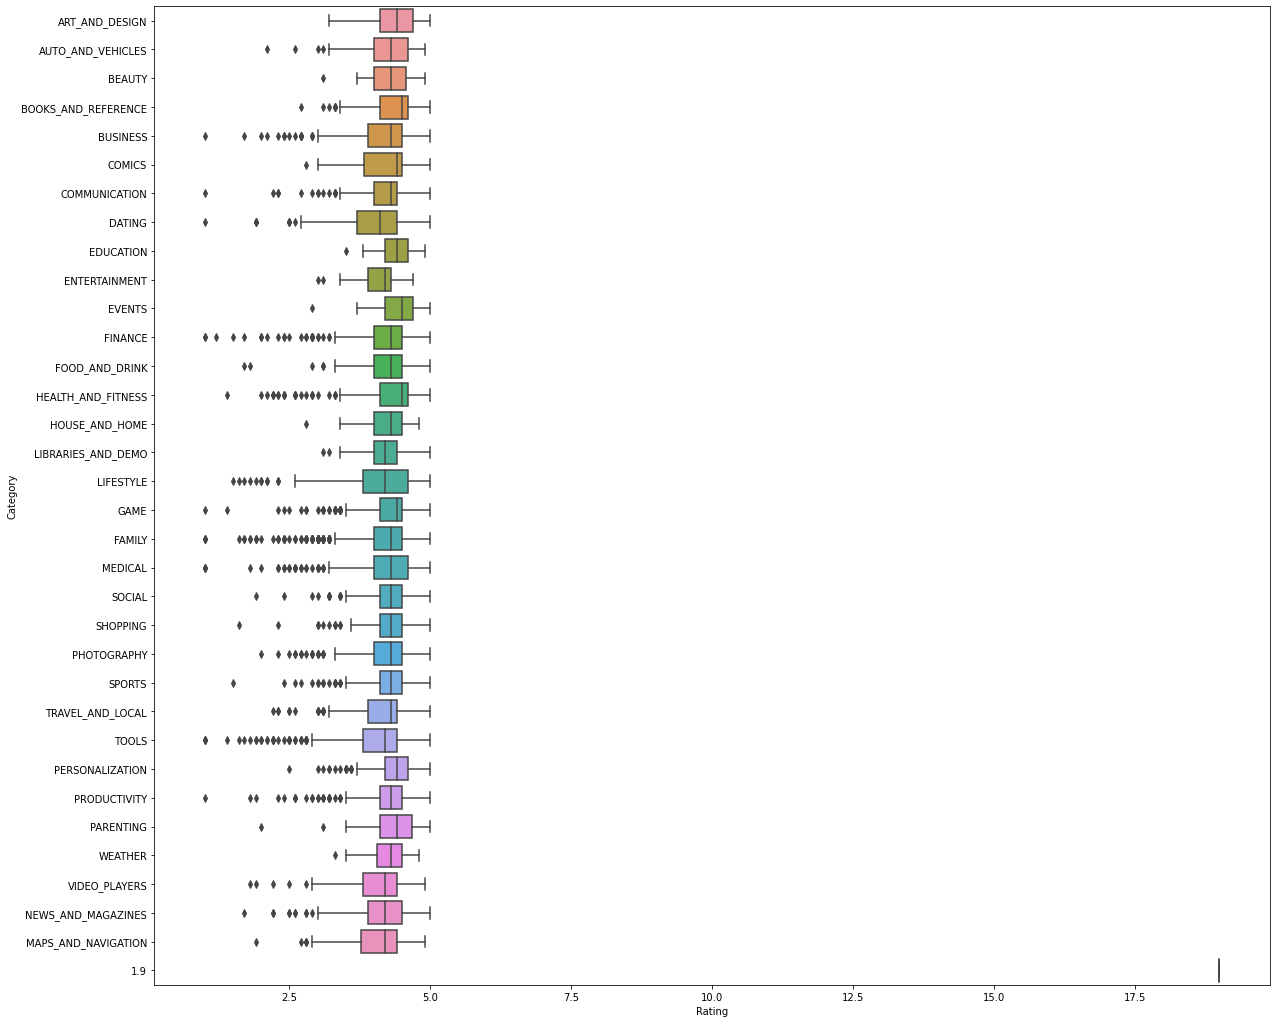

In [368]:
#Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.
plt.figure(figsize=(20,18))
sns.boxplot(x=df.Rating, y=df.Category)
plt.show()

In [369]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.
df.isnull().sum() / len(df) * 100
df = df.dropna()

In [370]:
import numpy as np

In [371]:
df = df[(df.Size != "Varies with device") & (df.Size != "1,000+")]

In [372]:
j = 0
size = []
for i in df.Size:
    if type(i) == pd.Series:
        df.Size.loc[j] = string(df.Size.loc[j])
    if i[-1] == "M":
        size.append(np.float64(i[0:-1])*1000000)
        j += 1
    elif i[-1] == "k":
        size.append(np.float64(i[0:-1])*1000)
        j += 1
    else:
        df.drop(j)

In [373]:
for i in range(len(size)):
    size[i] = size[i] / 1000

AttributeError: module 'seaborn' has no attribute 'xlabel'

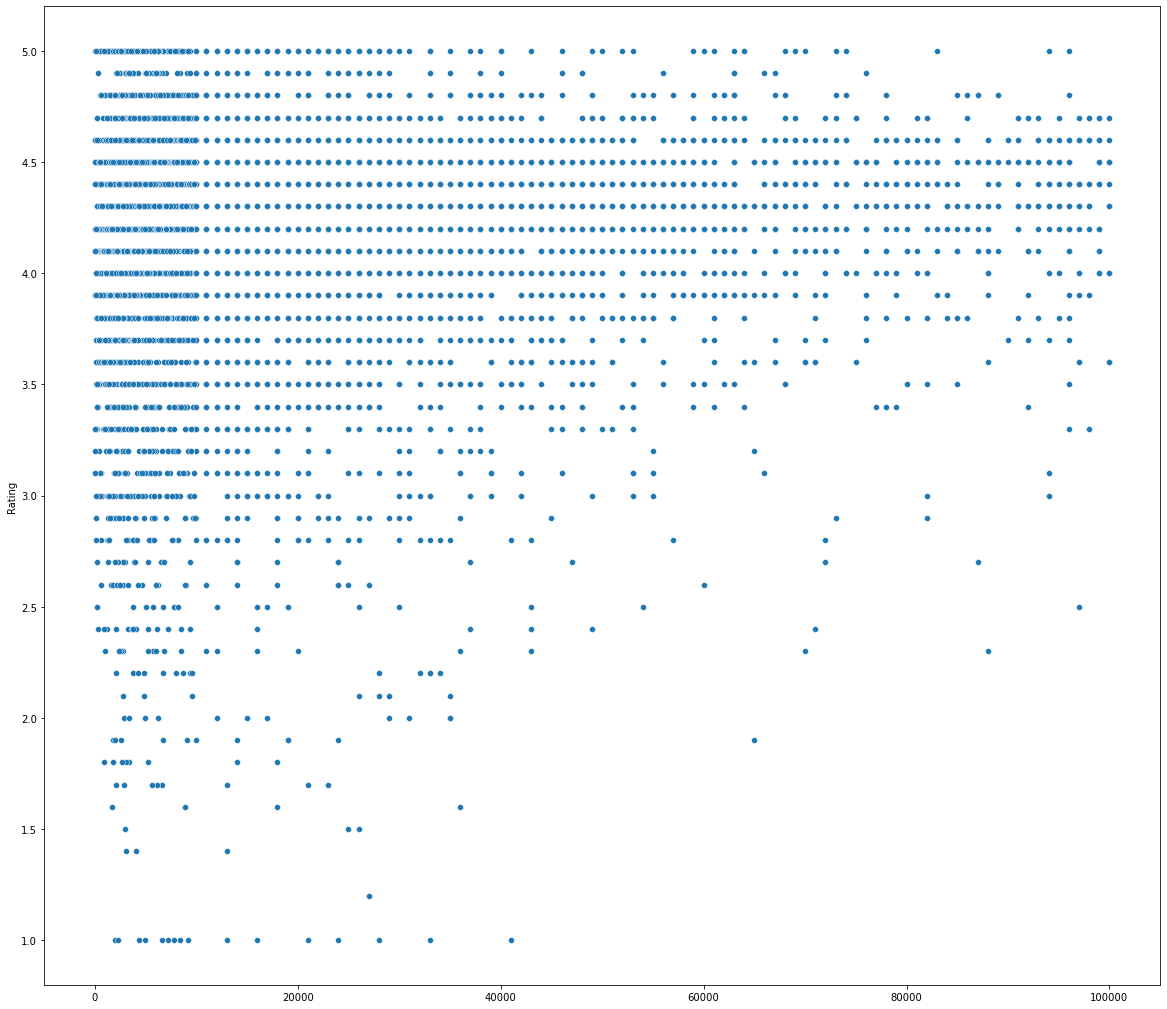

In [374]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.
plt.figure(figsize=(20,18))
sns.scatterplot(x=size, y=df.Rating)
sns.xlabel("Size (per thousand)")
plt.xticks(rotation=90)
plt.show()

In [408]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
maps = {"Free":0, "Paid":1}
df.Type = df.Type.map(maps)

In [409]:
prices = []
prices2 = []
for i in df[df['Type'] == 1].Price:
    prices.append(float(i[1::]))
for i in df[df['Type'] == 0].Price:
    prices2.append(i)

In [424]:
print("Paid : ",np.mean(prices))
print("Free : ",np.mean(0))

Paid :  13.920837500000003
Free :  0.0


In [429]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [504]:
df['Installs'].sort_values(ascending=False)[1::].head(10)

3767    500,000,000+
4048    500,000,000+
4147    500,000,000+
4041    500,000,000+
4039    500,000,000+
3522    500,000,000+
4365    500,000,000+
3255    500,000,000+
3533    500,000,000+
403     500,000,000+
Name: Installs, dtype: object

In [505]:
j = 0;
list1 = {}
for i in df.App:
    list1[i] = df.Installs.loc[j]
    j = j + 1

In [508]:
dict(sorted(list1.items()))

{'"i DT" Fútbol. Todos Somos Técnicos.': '500+',
 '+Download 4 Instagram Twitter': '1,000,000+',
 '- Free Comics - Comic Apps': '10,000+',
 '.R': '10,000+',
 '/u/app': '10,000+',
 '058.ba': '100+',
 '1. FC Köln App': '100,000+',
 '10 Best Foods for You': '500,000+',
 '10 Minutes a Day Times Tables': '100,000+',
 '10 WPM Amateur ham radio CW Morse code trainer': '100+',
 '10,000 Quotes DB (Premium)': '500+',
 '100 Doors of Revenge': '10,000,000+',
 '100+ C Programs': '5,000+',
 '100000+ Messages - DP, Status, Jokes & GIF 2018': '10,000+',
 '101 C Programming Problems': '50,000+',
 '104 Looking for a job - looking for a job, looking for a job, looking for a part-time job, health checkup, resume, treatment room': '1,000,000+',
 '11st': '10,000,000+',
 '12 Step Meditations & Sober Prayers AA NA AL-ANON': '50,000+',
 '14thStreetVet': '5+',
 '17th Edition Cable Sizer': '1,000+',
 '1800 Contacts - Lens Store': '1,000,000+',
 '1LINE – One Line with One Touch': '10,000,000+',
 '1st Fed CI Mobil

In [507]:
list1

{'"i DT" Fútbol. Todos Somos Técnicos.': '500+',
 '+Download 4 Instagram Twitter': '1,000,000+',
 '- Free Comics - Comic Apps': '10,000+',
 '.R': '10,000+',
 '/u/app': '10,000+',
 '058.ba': '100+',
 '1. FC Köln App': '100,000+',
 '10 Best Foods for You': '500,000+',
 '10 Minutes a Day Times Tables': '100,000+',
 '10 WPM Amateur ham radio CW Morse code trainer': '100+',
 '10,000 Quotes DB (Premium)': '500+',
 '100 Doors of Revenge': '10,000,000+',
 '100+ C Programs': '5,000+',
 '100000+ Messages - DP, Status, Jokes & GIF 2018': '10,000+',
 '101 C Programming Problems': '50,000+',
 '104 Looking for a job - looking for a job, looking for a job, looking for a part-time job, health checkup, resume, treatment room': '1,000,000+',
 '11st': '10,000,000+',
 '12 Step Meditations & Sober Prayers AA NA AL-ANON': '50,000+',
 '14thStreetVet': '5+',
 '17th Edition Cable Sizer': '1,000+',
 '1800 Contacts - Lens Store': '1,000,000+',
 '1LINE – One Line with One Touch': '10,000,000+',
 '1st Fed CI Mobil